# Logistic Regression

In [287]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [288]:
data = pd.read_csv(r'C:\Users\goura\OneDrive\Desktop\datasets\diabetes.csv')
data = data.rename({'Number of times pregnant': 'Pregnancies', 'Plasma glucose concentration a 2 hours in an oral glucose tolerance test': 'Glucose','Diastolic blood pressure (mm Hg)':'BloodPressure',
'Triceps skin fold thickness (mm)':'SkinThickness','2-Hour serum insulin (mu U/ml)':'Insulin','Body mass index (weight in kg/(height in m)^2)':'BMI','Age (years)':'Age','Class variable':'Outcome'}, axis=1) 

In [289]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes pedigree function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [290]:

print(data.shape)

(768, 9)


In [291]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes pedigree function,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


C:\Program Files\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Program Files\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Program Files\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

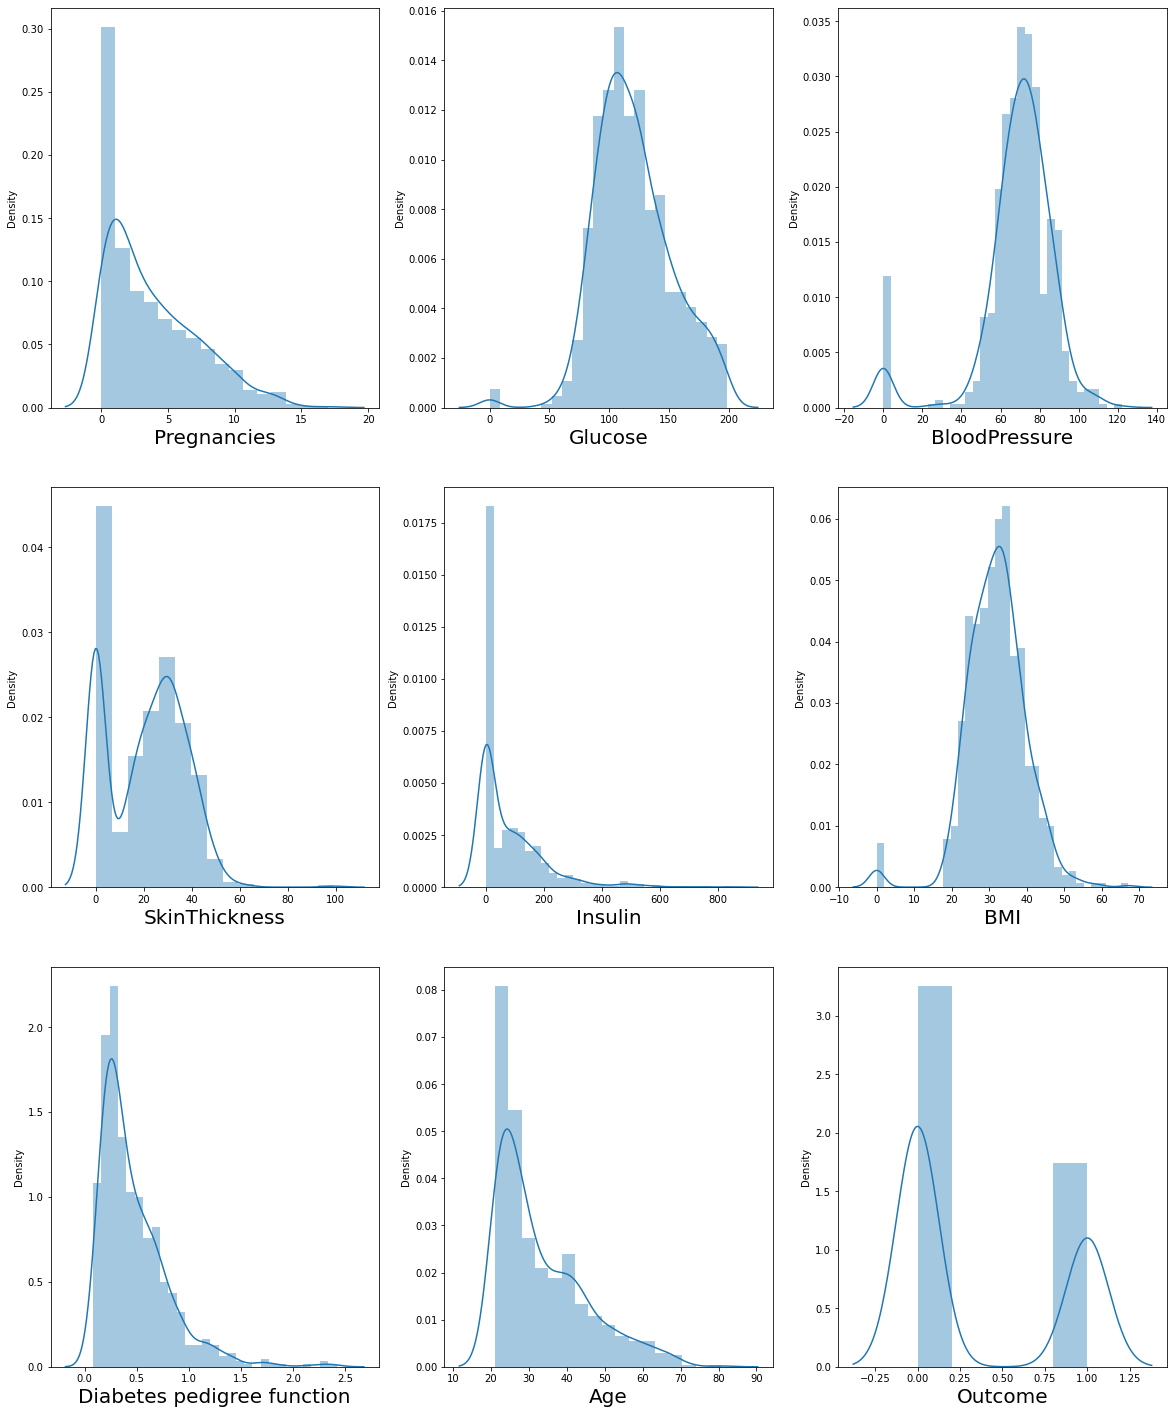

In [292]:
plt.figure(figsize=(20,25))
num = 1
for name in data:
    if num <=9:
        ax = plt.subplot(3,3,num)
        sns.distplot(data[name])
        plt.xlabel(name,fontsize=20)
    num += 1
plt.show()

In [293]:
# replacing zero values  with  the mean of the column

In [294]:
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())

C:\Program Files\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Program Files\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Program Files\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

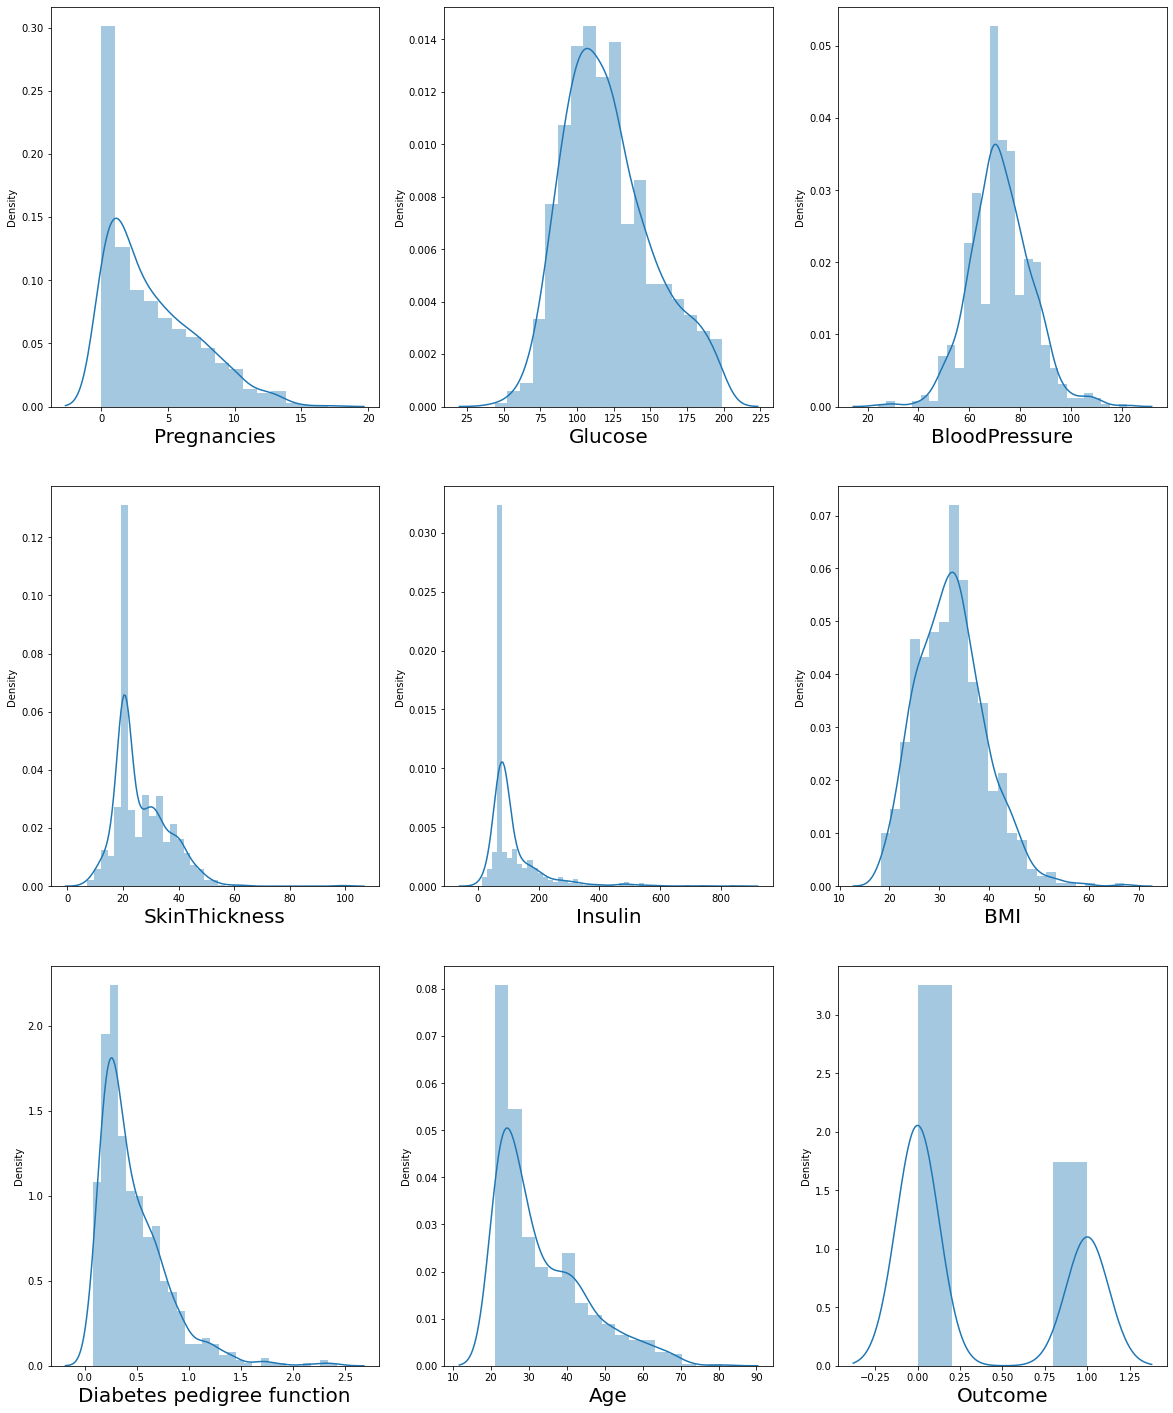

In [295]:
plt.figure(figsize=(20,25))
num = 1
for name in data:
    if num <=9:
        ax = plt.subplot(3,3,num)
        sns.distplot(x=data[name])
        plt.xlabel(name,fontsize=20)
    num += 1
plt.show()

In [296]:
df_feature = data.drop('Outcome',axis=1)
df_feature.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes pedigree function,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [297]:
data.shape

(768, 9)

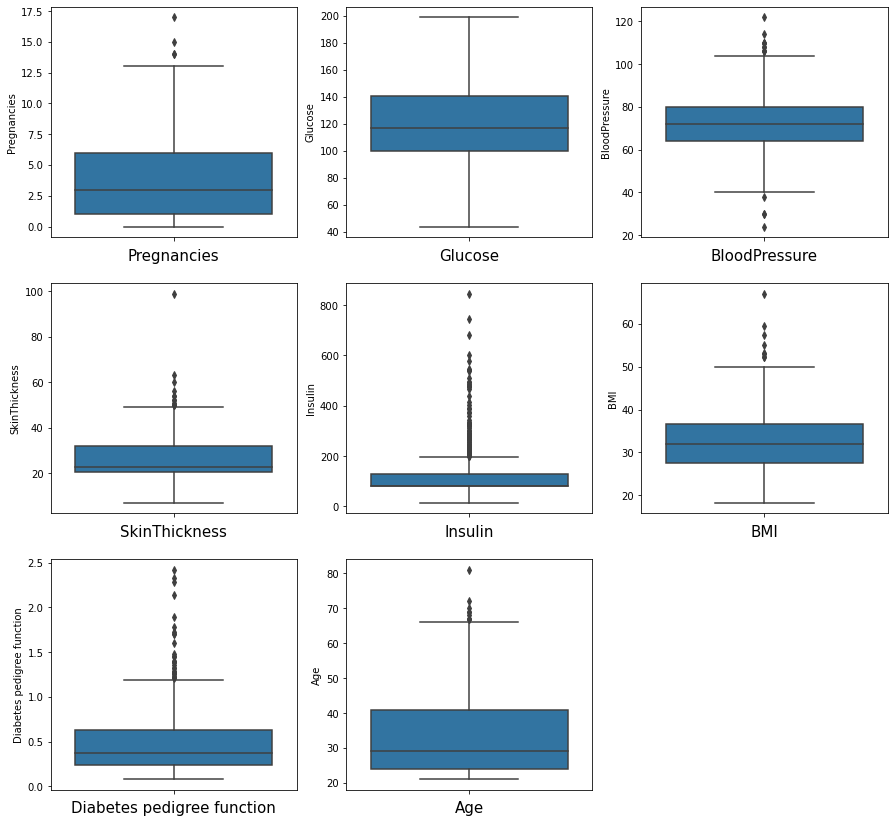

In [298]:
plt.figure(figsize=(15,50))
num = 1
for name in df_feature:
    if num<=30:
        ax = plt.subplot(10,3,num)
        sns.boxplot(y = df_feature[name],orient='v')
        plt.xlabel(name,fontsize=15)
    num+=1
plt.show()

In [299]:
data.shape

(768, 9)

In [300]:
# find the iqr
# 1st quantile
q1 = data.quantile(0.25)

# 3rd quantile
q3 = data.quantile(0.75)

iqr = q3-q1
iqr

Pregnancies                    5.000000
Glucose                       40.500000
BloodPressure                 16.000000
SkinThickness                 11.463542
Insulin                       47.450521
BMI                            9.100000
Diabetes pedigree function     0.382500
Age                           17.000000
Outcome                        1.000000
dtype: float64

# Outlier detection formula



# higherside ==>Q3+(1.5*IQR)

# lowerside==>Q1-(1.5*IQR)

In [301]:
data.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Diabetes pedigree function', 'Age', 'Outcome'],
      dtype='object')

In [302]:
preg_high = (q3.Pregnancies +(1.5*iqr.Pregnancies))
preg_high

13.5

In [303]:
index = np.where(data['Pregnancies']>preg_high)
index

(array([ 88, 159, 298, 455], dtype=int64),)

In [304]:
data = data.drop(data.index[index])
data.shape

(764, 9)

In [305]:
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes pedigree function,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
759,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
760,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
761,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
762,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [306]:
data.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Diabetes pedigree function', 'Age', 'Outcome'],
      dtype='object')

In [307]:
preg_high = (q3.BloodPressure +(1.5*iqr.BloodPressure))
preg_high

104.0

In [308]:
preg_low = (q1.BloodPressure -(1.5*iqr.BloodPressure))
preg_low

40.0

In [309]:
index = np.where(data['BloodPressure']>preg_high)
index

(array([ 43,  84, 105, 175, 359, 545, 654, 658, 668, 687], dtype=int64),)

In [310]:
data = data.drop(data.index[index])
data.shape

(754, 9)

In [311]:
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes pedigree function,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
749,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
750,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
751,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
752,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [312]:
# index = np.where(data['BloodPressure']<preg_low)
# data = data.drop(data.index[index])
# data.shape
# data.reset_index()

In [313]:
data.keys()

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Diabetes pedigree function', 'Age', 'Outcome'],
      dtype='object')

In [314]:
preg_high = (q3.SkinThickness +(1.5*iqr.SkinThickness))
index = np.where(data['SkinThickness']<preg_high)
data = data.drop(data.index[index])
data.shape
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes pedigree function,Age,Outcome
0,57,0,100.0,88.0,60.0,110.000000,46.8,0.962,31,0
1,86,13,106.0,72.0,54.0,79.799479,36.6,0.178,45,0
2,99,1,122.0,90.0,51.0,220.000000,49.7,0.325,31,1
3,120,0,162.0,76.0,56.0,100.000000,53.2,0.759,25,1
4,150,1,136.0,74.0,50.0,204.000000,37.4,0.399,24,0
5,211,0,147.0,85.0,54.0,79.799479,42.8,0.375,24,0
6,273,1,71.0,78.0,50.0,45.000000,33.2,0.422,21,0
7,275,2,100.0,70.0,52.0,57.000000,40.5,0.677,25,0
8,445,0,180.0,78.0,63.0,14.000000,59.4,2.420,25,1
9,532,1,86.0,66.0,52.0,65.000000,41.3,0.917,29,0


In [315]:
preg_high = (q3.Insulin +(1.5*iqr.Insulin))
preg_high
index = np.where(data['Insulin']<preg_high)
data = data.drop(data.index[index])
data.shape
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Diabetes pedigree function,Age,Outcome
0,99,1,122.0,90.0,51.0,220.0,49.7,0.325,31,1
1,150,1,136.0,74.0,50.0,204.0,37.4,0.399,24,0


In [316]:
preg_high = (q3.BMI +(1.5*iqr.BMI))
preg_high
index = np.where(data['BMI']<preg_high)
data = data.drop(data.index[index])
data.shape
# data.reset_index()

(0, 9)

In [285]:
# preg_high = (q3.Diabetes pedigree function +(1.5*iqr.Diabetes pedigree function))
# index = np.where(data['Diabetes pedigree function']<preg_high)
# data = data.drop(data.index[index])
# data.shape
# data.reset_index()

In [286]:
# preg_high = (q3.Age +(1.5*iqr.Age))
# index = np.where(data['Age']<preg_high)
# data = data.drop(data.index[index])
# data.shape
# data.reset_index()